# Métodos Numéricos 2024 

## Guía 2: 2024-04-04 - Solución de ecuaciones de una variable

In [1]:
using Plots
using LaTeXStrings
using DataFrames # Recuerde instalar este paquete ingresando en una celda: using Pkg; Pkg.add("DataFrames")

In [3]:
v=[1 2 3 4 5]

1×5 Matrix{Int64}:
 1  2  3  4  5

In [4]:
f(x)=x^2-1

f (generic function with 1 method)

In [5]:
f.(v) #Aplica la funcion a cada elemento del Array (Transformacion lineal)

1×5 Matrix{Int64}:
 0  3  8  15  24

### Problema 1

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de la bisección**.
El programa debe tomar como datos de entrada:

* la función $f:\mathbb{R}\to \mathbb{R}$, 

* el intervalo inicial $[a,b]$, 

* la máxima tolerancia permitida $\varepsilon_x$ al error relativo $(p-x)/x$ de la aproximación $p$ de la raíz $x$ de $f$ en $[a,b]$,

* la máxima tolerancia permitida $\varepsilon_f$ al valor de $|f(p)|$,

* y el número máximo $n_{\max}$ de iteraciones permitidas.

El programa debe retornar una tupla con las siguientes componentes:

* un booleano indicando si el algoritmo convergió o no dentro de las tolerancias máximas permitidas $\varepsilon_x$ y $\varepsilon_f$,

* un vector de componentes $p_i$ que representan las aproximaciones a la raíz $x$ obtenidas por el algoritmo en sucesivas iteraciones $i=1,2,...,n$,

* un vector de componentes $f_i=f(p_i)$,

* un vector de componentes $c_i=|b_i-a_i|/2$ que representan cotas de los errores absolutos $|x-p_i|$,

* y un vector de componentes $r_i=c_i/|p_i|$ que representan estimaciones de los errores relativos $|x-p_i|/|x|$.

El programa debe deternerse si se cumple:

$$
(r_i<\varepsilon_x \;\; \text{AND} \;\; |f_i|<\varepsilon_f) \;\; \text{OR} \;\; i=n_{\max}
$$

El programa debe trabajar con números de precisión suficientemente alta como para obtener resultados con 12 cifras significativas en los reales (ej. `Float64`).

Con el programa desarrollado, Ud. debe:

1. Encontrar una aproximación a $\sqrt{3}$ con un error (relativo en $x$ y absoluto en $y$) menor a $10^{-5}$. Para ello: 

    * Note que $\sqrt{3}$ es la raíz positiva de la ecuación $f(x)=x^2-3$.
    * Grafique $f(x)$ vs $x$ en el intervalo $[1,2]$ para determinar que tiene una raíz allí.
    * Utilice el programa desarrollado para calcular los vectores de aproximaciones y errores.
    * Imprima una lista con los valores $i$, $p_i$, $f_i$, $c_i$ y $r_i$ para $i=1,...,n$, utilizando el paquete `DataFrames`.
    * Grafique $p_i$ vs $i$ usando puntos (en vez de una línea contínua).
    * Grafique $|f_i|$ vs $i$ usando puntos, escala logarítmica en el eje $y$ y lineal en el eje $x$.
    * En una misma figura, grafique con puntos de un color los errores absolutos $c_i$ vs $i$ y con puntos de otro color los errores relativos $r_i$ vs $i$, utilizando escala logarítimica en el eje $y$ y lineal en el eje $x$. 
    * Responda: 
        * Cuanto vale la presunta mejor aproximación $p_n$? 
        * Cuántas iteraciones fueron necesarias?
        * Cuales son los valores exactos de los errores absoluto y relativo que se obtienen de comparando el resultado $p_n$ con el "analítico"?   
    
2. Encontrar la menor solución positiva de la ecuación $g(x)=\tan(x)-2x$ con un error relativo en $x$ y absoluto en $y$ menor a $10^{-5}$. Para ello, repita lo realizado en el inciso anterior considerando el intérvalo $x\in [0.8,1.4]$, pero exceptuando el último item ya que no podemos calcular el valor analítico en este caso. 

**IMPORTANTE:** Recuerde poner títulos, etiquetas a los ejes y leyendas para las curvas o puntos de los gráficos.

In [6]:
#Metodo de biseccion
function biseccion(f,intervalo;tolx=1e-5,toly=1e-5,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_p=zeros(n_max) #Vector de los puntos de biseccion
    vec_fp=zeros(n_max) #Vector de los valores de f en los puntos de biseccion
    vec_c=zeros(n_max) #Vector de cotas de los errores absolutos
    vec_r=zeros(n_max) #Vector de estimacion de error relativo
    for i in 1:n_max
        p=(a+b)/2
        fp=f(p)
        c=(b-a)/2
        r=c/(abs(p))
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
        if f(a)*fp<0 #Redefine a o b siguiendo el metodo, fijandose el signo de f(p)
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r 
end
f(x)=tan.(x)-2x #Con tolx=1e-5 y toly=1e-5 e intervalo [0.8,1.4]
intervalo=0.8,1.4

(0.8, 1.4)

In [7]:
conv,vec_p, vec_fp, vec_c, vec_r=biseccion(f,intervalo;tolx=1e-5,toly=1e-5,n_max=100)

(true, [1.1, 1.25, 1.175, 1.1375000000000002, 1.15625, 1.165625, 1.1609375, 1.1632812499999998, 1.1644531249999999, 1.1650390625, 1.16533203125, 1.1654785156249998, 1.1655517578124999, 1.16558837890625, 1.1655700683593748, 1.1655609130859372], [-0.23524034275134786, 0.5095696738628313, 0.04322115170504448, -0.11338341785151274, -0.0400159397525508, 0.00028302427270565644, -0.020185004783326743, -0.010032004802337458, -0.004894919598906977, -0.0023110771806220676, -0.0010153116203532875, -0.0003664653146806529, -4.1800974913908107e-5, 0.00012059152994714495, 3.939024846255634e-5, -1.2066204040372952e-6], [0.29999999999999993, 0.1499999999999999, 0.07499999999999996, 0.03749999999999998, 0.018749999999999933, 0.009375000000000022, 0.004687499999999956, 0.002343749999999978, 0.0011718750000000444, 0.0005859375000000222, 0.0002929687499999556, 0.0001464843749999778, 7.324218750004441e-5, 3.6621093750022204e-5, 1.8310546875066613e-5, 9.155273437477796e-6], [0.27272727272727265, 0.1199999999

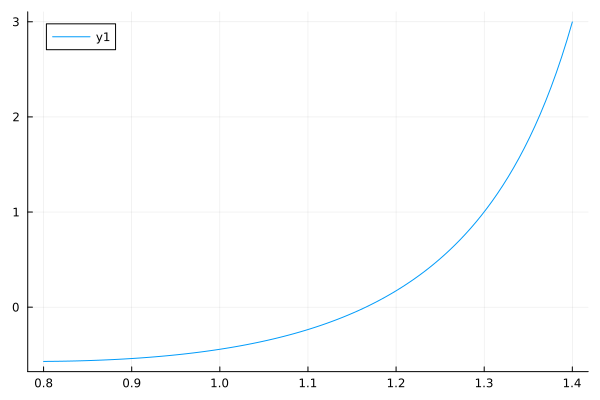

In [8]:
using Plots
x=range(0.8,1.4,length=100)
plot(x,f)

In [9]:
using DataFrames
data=DataFrame(p_i=vec_p,f_i=vec_fp,c_i=vec_c,r_i=vec_r)

Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.1,-0.23524,0.3,0.272727
2,1.25,0.50957,0.15,0.12
3,1.175,0.0432212,0.075,0.0638298
4,1.1375,-0.113383,0.0375,0.032967
5,1.15625,-0.0400159,0.01875,0.0162162
6,1.16562,0.000283024,0.009375,0.0080429
7,1.16094,-0.020185,0.0046875,0.00403769
8,1.16328,-0.010032,0.00234375,0.00201478
9,1.16445,-0.00489492,0.00117188,0.00100637


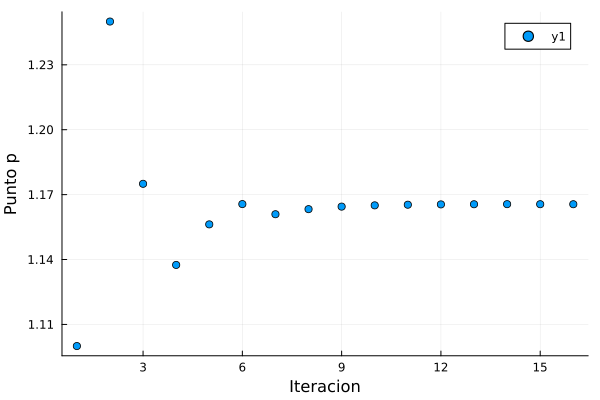

In [10]:
using Plots
n=length(vec_p)
scatter(1:n,vec_p,xlabel="Iteracion",ylabel="Punto p") #scatter grafica los valores de las cordenadas de un vector

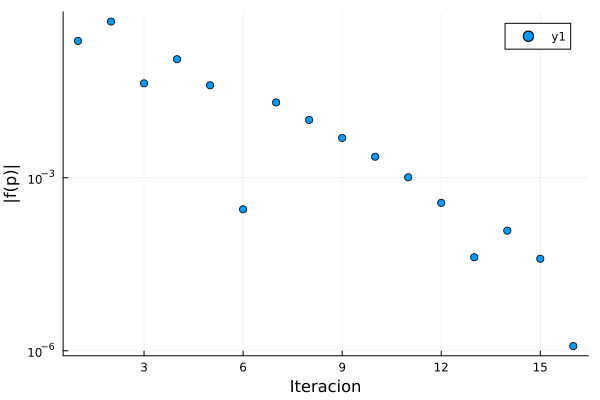

In [11]:
scatter(1:n,i->abs(vec_fp[i]),yscale=:log10,xlabel="Iteracion",ylabel="|f(p)|") 

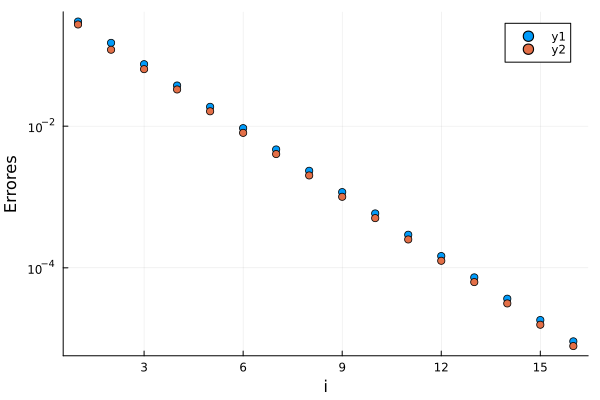

In [12]:
n=length(vec_c)
scatter(1:n,[vec_c,vec_r],yscale=:log10,xlabel="i",ylabel="Errores")

In [ ]:
#La mejor aproximacion de p es en la iteracion 16 pues es la que tiene menos error
#Fueron necesarias 16 iteraciones

In [13]:
#1.
using DataFrames
function biseccion(f,intervalo;tolx=1e-5,toly=1e-5,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_p=zeros(n_max) #Vector de los puntos de biseccion
    vec_fp=zeros(n_max) #Vector de los valores de f en los puntos de biseccion
    vec_c=zeros(n_max) #Vector de cotas de los errores absolutos
    vec_r=zeros(n_max) #Vector de estimacion de error relativo
    for i in 1:n_max
        p=(a+b)/2
        fp=f(p)
        c=(b-a)/2
        r=c/(abs(p))
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
        if f(a)*fp<0 #Redefine a o b siguiendo el metodo
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r #Si no se cuple lo que esta dentro del loop en las iteraciones dadas entonces indica que no converge usando el booleano false
end
f(x)=x^2-3
intervalo=1,2

(1, 2)

In [14]:
conv,vec_p, vec_fp, vec_c, vec_r=biseccion(f,intervalo;tolx=1e-5,toly=1e-5,n_max=100) #Define cada valor devuelto por la funcion para luego utulizarlos

(true, [1.5, 1.75, 1.625, 1.6875, 1.71875, 1.734375, 1.7265625, 1.73046875, 1.732421875, 1.7314453125, 1.73193359375, 1.732177734375, 1.7320556640625, 1.73199462890625, 1.732025146484375, 1.7320404052734375, 1.7320480346679688], [-0.75, 0.0625, -0.359375, -0.15234375, -0.0458984375, 0.008056640625, -0.01898193359375, -0.0054779052734375, 0.001285552978515625, -0.0020971298217773438, -0.00040602684020996094, 0.00043970346450805664, 1.6823410987854004e-5, -0.00019460543990135193, -8.889194577932358e-5, -3.603450022637844e-5, -9.605602826923132e-6], [0.5, 0.25, 0.125, 0.0625, 0.03125, 0.015625, 0.0078125, 0.00390625, 0.001953125, 0.0009765625, 0.00048828125, 0.000244140625, 0.0001220703125, 6.103515625e-5, 3.0517578125e-5, 1.52587890625e-5, 7.62939453125e-6], [0.3333333333333333, 0.14285714285714285, 0.07692307692307693, 0.037037037037037035, 0.01818181818181818, 0.009009009009009009, 0.004524886877828055, 0.002257336343115124, 0.0011273957158962795, 0.0005640157924421884, 0.0002819283901

In [15]:
#Colocar valor o vector devuelto por la funcion para printearlo 
vec_r

17-element Vector{Float64}:
 0.3333333333333333
 0.14285714285714285
 0.07692307692307693
 0.037037037037037035
 0.01818181818181818
 0.009009009009009009
 0.004524886877828055
 0.002257336343115124
 0.0011273957158962795
 0.0005640157924421884
 0.000281928390188892
 0.00014094432699083862
 7.047713017125943e-5
 3.5239806885858265e-5
 1.761959298740199e-5
 8.80971888187048e-6
 4.404840038234012e-6

In [16]:
using DataFrames
data= DataFrame(p_i=vec_p,f_i=vec_fp,c_i=vec_c,r_i=vec_r) #Crea una tabla de valores usando las cordenadas de los vectores

Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.5,-0.75,0.5,0.333333
2,1.75,0.0625,0.25,0.142857
3,1.625,-0.359375,0.125,0.0769231
4,1.6875,-0.152344,0.0625,0.037037
5,1.71875,-0.0458984,0.03125,0.0181818
6,1.73438,0.00805664,0.015625,0.00900901
7,1.72656,-0.0189819,0.0078125,0.00452489
8,1.73047,-0.00547791,0.00390625,0.00225734
9,1.73242,0.00128555,0.00195312,0.0011274


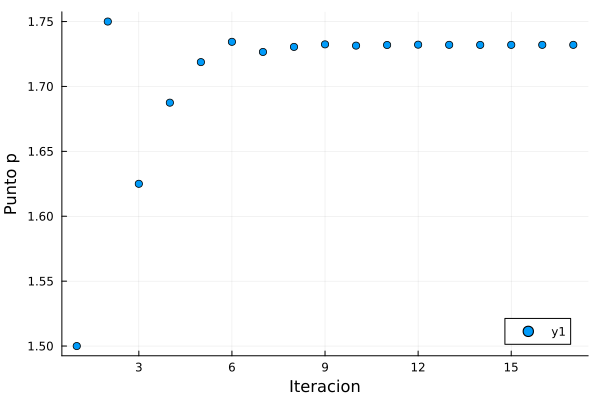

In [17]:
using Plots
n=length(vec_p)
scatter(1:n,vec_p,xlabel="Iteracion",ylabel="Punto p") #scatter grafica los valores de las cordenadas de un vector

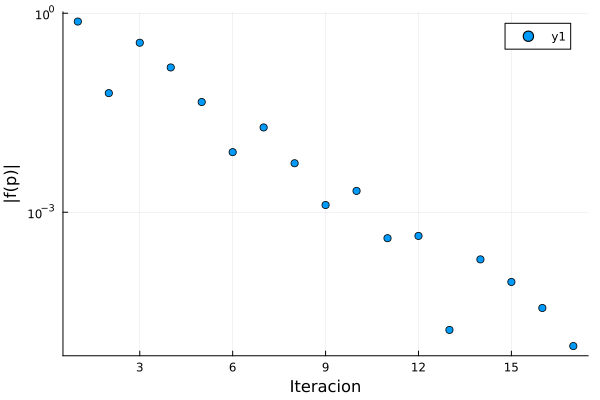

In [18]:
scatter(1:n,i->abs(vec_fp[i]),yscale=:log10,xlabel="Iteracion",ylabel="|f(p)|") #i->abs(vec_fp) manda cada coordenada i del vector a lo indicado
#yscale={:log10,:log2,:Identity,:ln} cabia la escala del eje elejido

In [ ]:
n=length(vec_c)
scatter(1:n,[vec_c,vec_r],yscale=:log10,xlabel="i",ylabel="Errores")

In [ ]:
# La mejor aproximacion de p fue fue en i=16 pues el error c fue el menor
#Fueron necesarias 16 iteraciones

In [ ]:
e=zeros(16)
for i in 1:16
    e[i]=abs(√3-vec_p[i])
end
data=DataFrame(error=e)

In [ ]:
#Por lo anterior el valor mas cercano al analitico fue dado por la iteracion 13

In [ ]:
using Plots
x=range(1,2,length=100)
f=@. x^2-3
plot(x,f)

In [ ]:
using DataFrames
x=range(1,2,100)
f=@. x^2-3
intervalo=1,2
biseccion(f,intervalo)

## Problema 2

Desarrolle un programa para encontrar la raíz de una función $f$ utilizando el **método de Newton** (también conocido como Newton-Raphson).
El programa debe tomar como datos de entrada la función $f:\mathbb{R}\to \mathbb{R}$, su derivada $f':\mathbb{R}\to \mathbb{R}$, una estimación inicial $p_1$ de la raíz $x$, la tolerancia $\varepsilon_x$ a la estimación $r_i:=\frac{|p_{i+1} - p_{i}|}{|p_{i+1}|}$ del error relativo $|x-p_i|/|x|$ en la iteración $i$ para $i=1,2,...,n$, la tolerancia en $\varepsilon_f$ al valor absoluto de $f_i:=f(p_{i})$ y el número máximo de iteraciones permitido $n_{\max}$.
El programa debe retornar una tupla con las siguientes componentes:

* Un booleano indicando si el algoritmo convergió.

* Un vector de componentes $p_i$ para $i=1,2,...,n$, donde $n$ es el número de iteraciones realizado por el programa.

* Un vector de valores $f_i:=f(p_i)$.

* Un vector de estimaciones $c_i:=|p_{i+1}-p_i|$ de errores absolutos $|x-p_i|$.

* Un vector de estimaciones $r_i:=c_i/|p_{i+1}|$ de errores relativos $|x-p_i|/|x|$.

El programa debe finalizar en la iteración $n$-ésima que satisfaga por vez primera:
$$
\left( r_n < \varepsilon_x \qquad \text{AND} \qquad 
f_n < \varepsilon_f \right) \qquad \text{OR} \qquad
n = n_{\max}
$$
y debe poder utlizar 13 cifras significativas para las variables reales (ej. `Float64`).

Utilice este programa para resolver los **incisos 1 y 2** del **problema 1**, usando $p_1=1$ en ambos casos. No hace falta graficar $f(x)$ vs $x$. Compare la cantidad de iteraciones $n$, la cantidad de evaluaciones de la función $f$ y su derivada $f'$ en los dos métodos.

In [19]:
#Metodo de Newton
function newton(f,df,p;tolx=1e-5,toly=1e-5,n_max)
    vec_p=zeros(n_max)
    vec_fp=zeros(n_max)
    vec_c=zeros(n_max)
    vec_r=zeros(n_max)
    for i in 1:n_max
        fp=f(p)
        dfp=df(p)
        p=p-fp/dfp #Calculo de p proveniente de la recta tangente
        c=abs(p-(p-fp/dfp)) #Error absoluto
        r=c/abs(p-fp/dfp) #Error relativo |p_n+1-p_n|/|p_n+1| (en los demas esto es distinto por un error, pero esto no cambia tanto)(usar este)
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly #Mecanismo de detencion
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r
end
p=1
f(x)=x^2-3
df(x)=2*x


df (generic function with 1 method)

In [20]:
conv,vec_p, vec_fp, vec_c, vec_r=newton(f,df,p;tolx=1e-5,toly=1e-5,n_max=100)

(true, [2.0, 1.75, 1.7321428571428572, 1.7320508100147276, 1.7320508075688772], [-2.0, 1.0, 0.0625, 0.00031887755102077975, 8.47267411785424e-9], [1.0, 0.25, 0.017857142857142794, 9.204712812960203e-5, 2.445850411092465e-9], [0.3333333333333333, 0.16666666666666666, 0.01041666666666663, 5.314625850340117e-5, 1.412112395235853e-9])

In [21]:
conv

true

In [22]:
using DataFrames
data=DataFrame(p_i=vec_p,f_i=vec_fp,c_i=vec_c,r_i=vec_r)

Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,2.0,-2.0,1.0,0.333333
2,1.75,1.0,0.25,0.166667
3,1.73214,0.0625,0.0178571,0.0104167
4,1.73205,0.000318878,9.20471e-5,5.31463e-5
5,1.73205,8.47267e-9,2.44585e-9,1.41211e-9


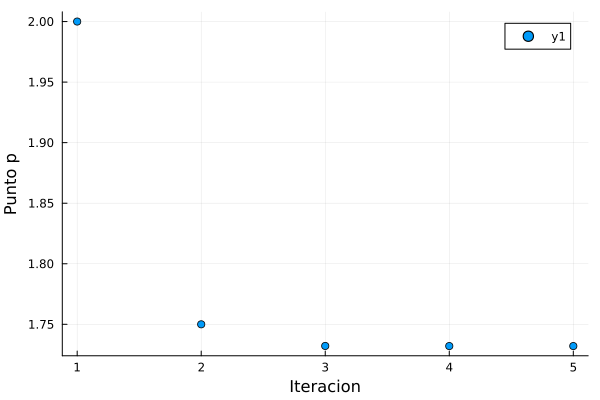

In [23]:
using Plots
n=length(vec_p)
scatter(1:n,vec_p,xlabel="Iteracion",ylabel="Punto p")

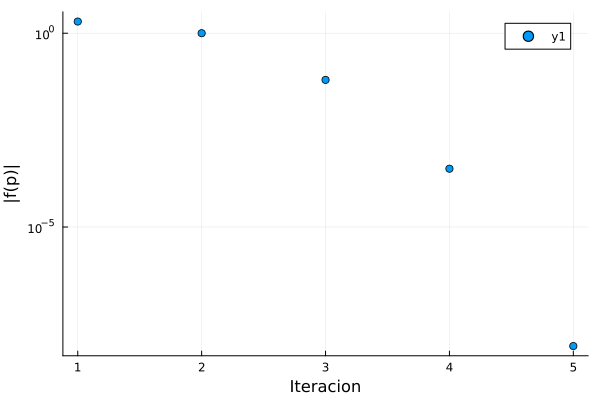

In [24]:
scatter(1:n,i->abs(vec_fp[i]),yscale=:log10,xlabel="Iteracion",ylabel="|f(p)|")

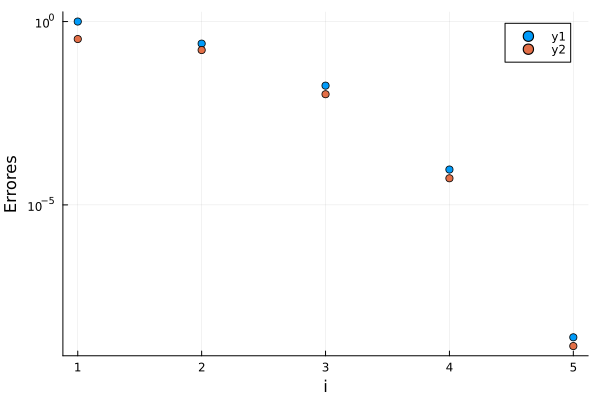

In [25]:
n=length(vec_c)
scatter(1:n,[vec_c,vec_r],yscale=:log10,xlabel="i",ylabel="Errores")

In [26]:
using DataFrames
e=zeros(5)
for i in 1:5
    e[i]=abs(√3-vec_p[i])
end
data=DataFrame(error=e)

Row,error
,Float64
1,0.267949
2,0.0179492
3,9.20496e-5
4,2.44585e-9
5,0.0


In [27]:
function newton(f,df,p;tolx=1e-5,toly=1e-5,n_max)
    vec_p=zeros(n_max)
    vec_fp=zeros(n_max)
    vec_c=zeros(n_max)
    vec_r=zeros(n_max)
    for i in 1:n_max
        fp=f(p)
        dfp=df(p)
        p=p-fp/dfp #Calculo de p proveniente de la recta tangente
        c=abs(p-(p-fp/dfp)) #Error absoluto
        r=c/abs(p) #Error relativo
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly #Mecanismo de detencion
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r
end
p=1
f(x)=tan(x)-2x
df(x)=(1/(cos(x)^2))-2

df (generic function with 1 method)

In [28]:
conv,vec_p, vec_fp, vec_c, vec_r=newton(f,df,p;tolx=1e-5,toly=1e-5,n_max=100)

(true, [1.3104780300916217, 1.2239290964998213, 1.1760509000038353, 1.1659265083113628, 1.1655616363485986, 1.1655611852078998], [-0.4425922753450977, 1.133327685248926, 0.31852867701817456, 0.048207117932219656, 0.001621894244293376, 2.000423291459441e-6], [0.31047803009162167, 0.08654893359180038, 0.047878196495986014, 0.010124391692472479, 0.00036487196276424605, 4.5114069879836904e-7], [0.23691967584524457, 0.07071400936484969, 0.040710990056493195, 0.008683559058225598, 0.0003130439020859463, 3.8705878723809733e-7])

In [29]:
using DataFrames
data=DataFrame(p_i=vec_p,f_i=vec_fp,c_i=vec_c,r_i=vec_r)

Row,p_i,f_i,c_i,r_i
,Float64,Float64,Float64,Float64
1,1.31048,-0.442592,0.310478,0.23692
2,1.22393,1.13333,0.0865489,0.070714
3,1.17605,0.318529,0.0478782,0.040711
4,1.16593,0.0482071,0.0101244,0.00868356
5,1.16556,0.00162189,0.000364872,0.000313044
6,1.16556,2.00042e-6,4.51141e-7,3.87059e-7


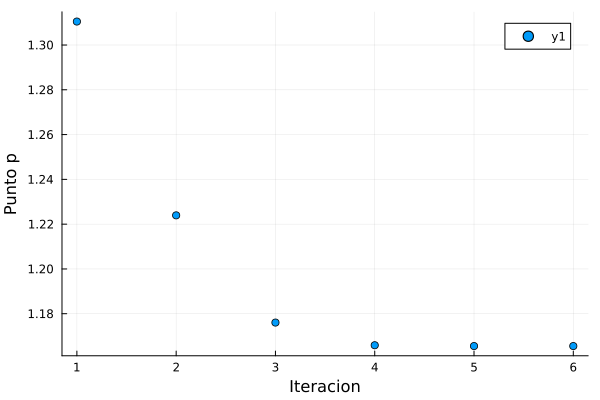

In [30]:
using Plots
n=length(vec_p)
scatter(1:n,vec_p,xlabel="Iteracion",ylabel="Punto p")

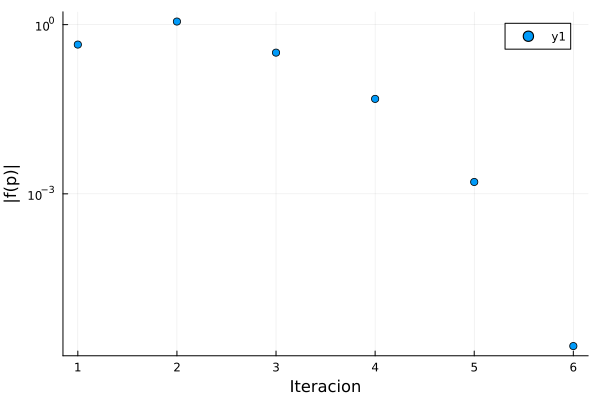

In [31]:
scatter(1:n,i->abs(vec_fp[i]),yscale=:log10,xlabel="Iteracion",ylabel="|f(p)|")

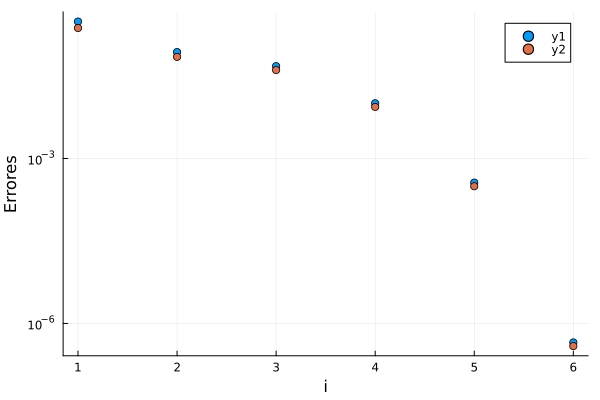

In [32]:
n=length(vec_c)
scatter(1:n,[vec_c,vec_r],yscale=:log10,xlabel="i",ylabel="Errores")

### Problema 3

Compute y grafique en escala log-lineal el error relativo estimado $r_i:=|p_{i+1}-p_i|/|p_{i+1}|$ vs $i$ de las aproximaciones de $\sqrt{3}$ con los métodos de la **bisección** y **Newton**, partiendo del intervalo $[0,2.5]$ y del valor inicial $p_1=2.5$, respectivamente. 
Utilice en ambos casos tolerancias $\varepsilon_x=\varepsilon_f=10^{-10}$.

In [ ]:
function newton(f,df,p;tolx=1e-10,toly=1e-10,n_max)
    vec_pn=zeros(n_max)
    vec_fpn=zeros(n_max)
    vec_cn=zeros(n_max)
    vec_rn=zeros(n_max)
    for i in 1:n_max
        fpn=f(p)
        dfpn=df(p)
        p=p-fpn/dfpn #Calculo de p proveniente de la recta tangente
        cn=abs(p-(p-fpn/dfpn)) #Error absoluto
        rn=cn/abs(p) #Error relativo
        vec_pn[i]=p
        vec_fpn[i]=fpn
        vec_cn[i]=cn
        vec_rn[i]=rn
        if rn<tolx && abs(fpn)<toly #Mecanismo de detencion
            return true, vec_pn[1:i], vec_fpn[1:i], vec_cn[1:i], vec_rn[1:i]
        end
    end
    return false, vec_pn, vec_fpn, vec_cn, vec_rn
end
f(x)=x^2-3
df(x)=2*x
p=2.5

In [ ]:
convn,vec_pn, vec_fpn, vec_cn, vec_rn=newton(f,df,p;tolx=1e-5,toly=1e-5,n_max=100)

In [ ]:
function biseccion(f,intervalo;tolx=1e-10,toly=1e-10,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_p=zeros(n_max) #Vector de los puntos de biseccion
    vec_fp=zeros(n_max) #Vector de los valores de f en los puntos de biseccion
    vec_c=zeros(n_max) #Vector de cotas de los errores absolutos
    vec_r=zeros(n_max) #Vector de estimacion de error relativo
    for i in 1:n_max
        p=(a+b)/2
        fp=f(p)
        c=(b-a)/2
        r=c/(abs(p))
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
        if f(a)*fp<0 #Redefine a o b siguiendo el metodo
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r #Si no se cuple lo que esta dentro del loop en las iteraciones dadas entonces indica que no converge usando el booleano false
end
intervalo=0,2.5

In [ ]:
conv,vec_p, vec_fp, vec_c, vec_r=biseccion(f,intervalo;tolx=1e-5,toly=1e-5,n_max=100)

In [ ]:
using Plots
n=length(vec_r)
m=length(vec_rn)
scatter(1:n,vec_r,yscale=:log10,xlabel="Iteraciones",ylabel="Error relativo",label=["Bisección" "Newton"])
scatter!(1:m,vec_rn) #scatter! se usa para agregar cosa al grafico igual funciona con plot

### Problema 4

Un objeto en caída vertical en el aire está sujeto a la fuerza de gravedad y a la resistencia del aire. Si un objeto de masa $m$ es dejado caer desde una altura $h_0$, su altura luego de $t$ segundos está dada por:
$$
h(t) = h_0 - \frac{mg}{k} t + \frac{m^2 g}{k^2} \left( 1 - e^{-kt/m}\right)
$$
donde $g=9.8\, m/s^2$ y $k$ representa el coeficiente de resistencia del aire en $kg / s$.
Suponga que $h_0 = 10\,m$, $m=0.1\,kg$, y $k=0.149\,kg/s$.

Grafique $h(t)$ para analizar su comportamiento.

Encuentre, con una precisión de $0.01\,s$, el tiempo que le toma a este objeto llegar al suelo. 
Utilice el método de **bisección** y el de **Newton**.

In [ ]:
using Plots
g=9.8
m=0.1
h0=10
k=0.149
t=range(0,2.5,100)
h(t)=h0-((m*g*t)/k)+(((m^2)*g/(k^2))*(1-exp((-k*t)/m)))
plot(t,h)

In [ ]:
function newton(f,df,p;tolx=1e-3,toly=1e-3,n_max)
    vec_pn=zeros(n_max)
    vec_fpn=zeros(n_max)
    vec_cn=zeros(n_max)
    vec_rn=zeros(n_max)
    for i in 1:n_max
        fpn=f(p)
        dfpn=df(p)
        p=p-fpn/dfpn #Calculo de p proveniente de la recta tangente
        cn=abs(p-(p-fpn/dfpn)) #Error absoluto
        rn=cn/abs(p) #Error relativo
        vec_pn[i]=p
        vec_fpn[i]=fpn
        vec_cn[i]=cn
        vec_rn[i]=rn
        if rn<tolx && abs(fpn)<toly #Mecanismo de detencion
            return true, vec_pn[1:i], vec_fpn[1:i], vec_cn[1:i], vec_rn[1:i]
        end
    end
    return false, vec_pn, vec_fpn, vec_cn, vec_rn
end
f(t)=h0-(m*g*t)/k+((m^2)*g/(k^2))*(1-exp((-k*t)/m))
df(t)=((-exp((k*t)/m))*g*m+g*m)/(k*(exp(k*t/m)))
p=2

In [ ]:
convn,vec_pn, vec_fpn, vec_cn, vec_rn=newton(f,df,p;tolx=1e-3,toly=1e-3,n_max=100)

In [ ]:
vec_pn

In [ ]:
function biseccion(f,intervalo;tolx=1e-3,toly=1e-3,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_p=zeros(n_max) #Vector de los puntos de biseccion
    vec_fp=zeros(n_max) #Vector de los valores de f en los puntos de biseccion
    vec_c=zeros(n_max) #Vector de cotas de los errores absolutos
    vec_r=zeros(n_max) #Vector de estimacion de error relativo
    for i in 1:n_max
        p=(a+b)/2
        fp=f(p)
        c=(b-a)/2
        r=c/(abs(p))
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
        if f(a)*fp<0 #Redefine a o b siguiendo el metodo
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r #Si no se cuple lo que esta dentro del loop en las iteraciones dadas entonces indica que no converge usando el booleano false
end
intervalo=2,2.5

In [ ]:
conv,vec_p, vec_fp, vec_c, vec_r=biseccion(f,intervalo;tolx=1e-3,toly=1e-3,n_max=100)

In [ ]:
vec_p

### Problema 5

Encuentre la solución a la ecuación 
$$
x - \cos x = 0 
$$
en el intervalo $[0, \pi/2]$ con un error relativo $\varepsilon_x=10^{-10}$ utilizando:

1. el método de la **secante** con $p_1=0.0$ y $p_2=\pi/2$,

2. el método de **regula falsi** con $a=0.0$ y $b=\pi/2$,

3. el método de **bisección** con $a=0.0$ y $b=\pi/2$ y

4. el método de **Newton** con $p_1=1$.

Graficar el error relativo $r_i$ retornado por cada método vs el número de iteración $i$. Utilice las escalas log-lineal (es decir, logarítmica en el eje $y$ y lineal en el $x$).

In [33]:
#Metodo de la secante
function secante(f,intervalo;tolx=1e-10,toly=1e-10,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_ps=zeros(n_max)
    vec_fps=zeros(n_max) 
    vec_cs=zeros(n_max) 
    vec_rs=zeros(n_max) 
    for i in 1:n_max
        fb=f(b)
        fa=f(a)
        p=b-fb*(b-a)/(fb-fa) #Formula de la raiz de la secante
        fp=f(p)
        c=abs(b-a)
        r=c/(abs(p))
        vec_ps[i]=p
        vec_fps[i]=fp
        vec_cs[i]=c
        vec_rs[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_ps[1:i], vec_fps[1:i], vec_cs[1:i], vec_rs[1:i]
        end
        a=b #Redefine a como b y b como el nuevo p
        b=p
    end
    return false, vec_ps, vec_fps, vec_cs, vec_rs 
end
f(x)=x^2-2
intervalo=0,1.5

(0, 1.5)

In [34]:
conv,vec_ps,vec_fps,vec_cs,vec_rs=secante(f,intervalo;tolx=1e-10,toly=1e-10,n_max=100)

(true, [1.3333333333333333, 1.4117647058823528, 1.4142857142857144, 1.4142134998513232, 1.4142135623715002, 1.414213562373095, 1.4142135623730951], [-0.22222222222222232, -0.006920415224913823, 0.0002040816326531747, -1.7683827158165855e-7, -4.510836149052011e-12, -4.440892098500626e-16, 4.440892098500626e-16], [1.5, 0.16666666666666674, 0.07843137254901955, 0.0025210084033615576, 7.221443439120456e-5, 6.252017703545221e-8, 1.5947243525715749e-12], [1.125, 0.11805555555555562, 0.0554565260447613, 0.0017826222162541882, 5.106331625762936e-5, 4.420844114275172e-8, 1.1276404038266872e-12])

In [35]:
#Metodo de Regula Falsi
function regula(f,intervalo;tolx=1e-10,toly=1e-10,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_pr=zeros(n_max)
    vec_fpr=zeros(n_max) 
    vec_cr=zeros(n_max) 
    vec_rr=zeros(n_max) 
    for i in 1:n_max
        fb=f(b)
        fa=f(a)
        p=b-fb*(b-a)/(fb-fa) #Formula de la raiz de la secante
        fp=f(p)
        c=abs(b-a)
        r=c/(abs(p))
        vec_pr[i]=p
        vec_fpr[i]=fp
        vec_cr[i]=c
        vec_rr[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_pr[1:i], vec_fpr[1:i], vec_cr[1:i], vec_rr[1:i]
        end
        if f(a)*fp<0 #Redefine a y b fijandose el signo de f(p)
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_pr, vec_fpr, vec_cr, vec_rr 
end
f(x)=x^2-2
intervalo=0,1.5

(0, 1.5)

In [36]:
conv,vec_pr,vec_fpr,vec_cr,vec_rr=regula(f,intervalo;tolx=1e-10,toly=1e-10,n_max=100)

(true, [1.3333333333333333, 1.4117647058823528, 1.4141414141414141, 1.41421143847487, 1.4142134998513232, 1.4142135605326258, 1.4142135623189167, 1.4142135623715002, 1.414213562373048, 1.4142135623730936, 1.414213562373095, 1.4142135623730951, 1.414213562373095], [-0.22222222222222232, -0.006920415224913823, -0.0002040608101214758, -6.007286838860537e-6, -1.7683827158165855e-7, -5.2056330357430625e-9, -1.5323942115230693e-10, -4.510836149052011e-12, -1.3278267374516872e-13, -4.218847493575595e-15, -4.440892098500626e-16, 4.440892098500626e-16, -4.440892098500626e-16], [1.5, 0.16666666666666674, 0.08823529411764719, 0.08585858585858586, 0.08578856152512992, 0.08578650014867684, 0.08578643946737419, 0.0857864376810833, 0.0857864376284998, 0.08578643762695193, 0.08578643762690641, 0.08578643762690508, 2.220446049250313e-16], [1.125, 0.11805555555555562, 0.06239495798319337, 0.06071127946127946, 0.06066167628448527, 0.06066021606833386, 0.06066017308355345, 0.06066017181819957, 0.060660171

In [37]:
#Metodo de Punto Fijo
function puntofijo(f,p;tolx=1e-5,toly=1e-5,n_max=100)
    g(x)=x-f(x) #Sino anda probar cambiando esto
    vec_pf=zeros(n_max)
    vec_fpf=zeros(n_max) 
    vec_cf=zeros(n_max) 
    vec_rf=zeros(n_max)
    for i in 1:n_max
        p=g(p)
        fp=f(p)
        c=abs(p-g(p))
        r=c/abs(g(p))
        vec_pf[i]=p
        vec_fpf[i]=fp
        vec_cf[i]=c
        vec_rf[i]=r
        fp=f(p)
        if r<tolx && abs(fp)<toly
            return true, vec_pf[1:i], vec_fpf[1:i], vec_cf[1:i], vec_rf[1:i]
        end
    end
    return false, vec_pf, vec_fpf, vec_cf, vec_rf
end     
f(x)=x-cos(x)
p=π/2

1.5707963267948966

In [38]:
conv, vec_pf, vec_fpf, vec_cf, vec_rf=puntofijo(f,p;tolx=1e-3,toly=1e-3,n_max=100)

(true, [0.0, 1.0, 0.5403023058681398, 0.8575532158463934, 0.6542897904977791, 0.7934803587425656, 0.7013687736227565, 0.7639596829006542, 0.7221024250267077, 0.7504177617637605, 0.7314040424225098, 0.744237354900557, 0.7356047404363473, 0.7414250866101092, 0.7375068905132428, 0.7401473355678757, 0.7383692041223232, 0.739567202212256, 0.7387603198742114], [-1.0, 0.45969769413186023, -0.31725090997825367, 0.2032634253486143, -0.13919056824478648, 0.0921115851198091, -0.06259090927789768, 0.04185725787394645, -0.028315336737052776, 0.019013719341250734, -0.012833312478047199, 0.008632614464209709, -0.0058203461737619255, 0.003918196096866389, -0.0026404450546329006, 0.0017781314455525, -0.0011979980899328169, 0.0008068823380446011, -0.0005435725226943244], [1.0, 0.45969769413186023, 0.31725090997825367, 0.2032634253486143, 0.13919056824478648, 0.0921115851198091, 0.06259090927789768, 0.04185725787394645, 0.028315336737052776, 0.019013719341250734, 0.012833312478047199, 0.00863261446420970

In [39]:
vec_pf

19-element Vector{Float64}:
 0.0
 1.0
 0.5403023058681398
 0.8575532158463934
 0.6542897904977791
 0.7934803587425656
 0.7013687736227565
 0.7639596829006542
 0.7221024250267077
 0.7504177617637605
 0.7314040424225098
 0.744237354900557
 0.7356047404363473
 0.7414250866101092
 0.7375068905132428
 0.7401473355678757
 0.7383692041223232
 0.739567202212256
 0.7387603198742114

### Problema 6

Dado el siguiente polinomio, $p(x) = -10 + 5 x - 12 x^2  + 6 x^3  - 2 x^4  + x^5$.

Grafique y observe que posee una única raíz real positiva. Encuentre la misma utilizando:

1. El método de bisección. Elija el intervalo $[a,b]$ utilizando el **teorema de las cotas de Cauchy** que acota la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio utilizando el **algoritmo de Horner**.

2. El método de Newton-Raphson. Elija el valor inicial utilizando los teoremas que acotan la región del espacio complejo donde se encuentran las raíces. Evalúe el polinomio y su derivada utilizando el **algoritmo de Horner**.

**Teorema de las cotas de Cauchy**

Sea $p(x) = a_0 + a_1x + a_2x^2+...+a_nx^n$ un polinomio sobre $\mathbb{C}$ de grado $n\geq 1$ y coeficientes $a_i\in \mathbb{C}$ para $i=0,1,...,n$. Luego, todas las raices de $p$ se encuentran en el intervalo $[-(M+1),M+1]$ para $M = \max\left\{\frac{|a_0|}{|a_n|},\frac{|a_0|}{|a_n|},...,\frac{|a_{n-1}|}{|a_n|}\right\}$.

**Algoritmo de Horner**

Cualquier polinomio
$$
p(x)=a_0+a_1x+a_2x^2+...+a_{n-1}x^{n-1}+a_nx^n
$$
puede ser reescrito como
$$
p(x)=a_0+x(a_1+x(a_2+...+x(a_{n-1}+xa_n)...))
$$
El algoritmo de Horner consiste en calcular $p(x)$ para un valor dado de $x$ sacando ventaja de la anterior expresión, ya que nos evita tener que calcular potencias $x^2, x^3, ..., x^n$ lo cual resulta numericamente costozo y tendiente a introducir errores numéricos indeseables.
Notar que
$$
p'(x)=a_1+2a_2x+3a_3x^2+...+(n-1)a_{n-1}x^{n-2}+na_nx^{n-1}
$$
lo cual se reduce a
$$
p'(x)=a_1+x(2a_2+x(3a_3+...+x((n-1)a_{n-1}+xna_n))+...)))
$$

In [40]:
using Plots
x=range(1,3,100)
p(x)=-10+5x-12x^2+6x^3-2x^4+x^5
plot(x,p)

LoadError: cannot define function p; it already has a value

In [41]:
#Teorema de las cotas de Cauchy
function c(a0,a1,a2,a3,a4,a5)
    m0=abs(a0/a5)
    m1=abs(a1/a5)
    m2=abs(a2/a5)
    m3=abs(a3/a5)
    m4=abs(a4/a5)
    println("m0=",m0)
    println("m1=",m1)
    println("m2=",m2)
    println("m3=",m3)
    println("m4=",m4)
end
c(-10,5,-12,6,-2,1)

m0=10.0
m1=5.0
m2=12.0
m3=6.0
m4=2.0


In [42]:
M=12
i=-(M+1),M+1

(-13, 13)

In [43]:
function biseccion(f,intervalo;tolx=1e-3,toly=1e-3,n_max=100)
    a,b=intervalo
    @assert a<=b
    fa=f(a)
    @assert fa*f(b)<0
    vec_p=zeros(n_max) #Vector de los puntos de biseccion
    vec_fp=zeros(n_max) #Vector de los valores de f en los puntos de biseccion
    vec_c=zeros(n_max) #Vector de cotas de los errores absolutos
    vec_r=zeros(n_max) #Vector de estimacion de error relativo
    for i in 1:n_max
        p=(a+b)/2
        fp=f(p)
        c=(b-a)/2
        r=c/(abs(p))
        vec_p[i]=p
        vec_fp[i]=fp
        vec_c[i]=c
        vec_r[i]=r
        if r<tolx && abs(fp)<toly
            return true, vec_p[1:i], vec_fp[1:i], vec_c[1:i], vec_r[1:i]
        end
        if f(a)*fp<0 #Redefine a o b siguiendo el metodo
            b=p
        else
            a=p
            fa=fp
        end
    end
    return false, vec_p, vec_fp, vec_c, vec_r
end
intervalo=-13,13
f(x)=-10+x*(5+x*((-12)+x*(6+x*(-2+x))))

f (generic function with 1 method)

In [44]:
conv,vec_p, vec_fp, vec_c, vec_r=biseccion(f,intervalo;tolx=1e-3,toly=1e-3,n_max=100)

(true, [0.0, 6.5, 3.25, 1.625, 2.4375, 2.03125, 1.828125, 1.9296875, 1.98046875, 2.005859375, 1.9931640625, 1.99951171875, 2.002685546875, 2.0010986328125, 2.00030517578125, 1.999908447265625, 2.0001068115234375, 2.0000076293945312], [-10.0, 9196.03125, 224.9267578125, -10.431243896484375, 33.22757625579834, 1.4618606865406036, -6.225567604415119, -2.8974416454148013, -0.8577663014193604, 0.26560052682870605, -0.3050098710304283, -0.02195930830157522, 0.1212540719222357, 0.04950610802263, 0.013738126415388408, -0.0041194036833189784, 0.00480715747853111, 0.00034332601354769565], [13.0, 6.5, 3.25, 1.625, 0.8125, 0.40625, 0.203125, 0.1015625, 0.05078125, 0.025390625, 0.0126953125, 0.00634765625, 0.003173828125, 0.0015869140625, 0.00079345703125, 0.000396728515625, 0.0001983642578125, 9.918212890625e-5], [Inf, 1.0, 1.0, 1.0, 0.3333333333333333, 0.2, 0.1111111111111111, 0.05263157894736842, 0.02564102564102564, 0.012658227848101266, 0.006369426751592357, 0.0031746031746031746, 0.0015847860

In [45]:
function newton(f,df,p;tolx=1e-3,toly=1e-3,n_max)
    vec_pn=zeros(n_max)
    vec_fpn=zeros(n_max)
    vec_cn=zeros(n_max)
    vec_rn=zeros(n_max)
    for i in 1:n_max
        fpn=f(p)
        dfpn=df(p)
        p=p-fpn/dfpn #Calculo de p proveniente de la recta tangente
        cn=abs(p-(p-fpn/dfpn)) #Error absoluto
        rn=cn/abs(p) #Error relativo
        vec_pn[i]=p
        vec_fpn[i]=fpn
        vec_cn[i]=cn
        vec_rn[i]=rn
        if rn<tolx && abs(fpn)<toly #Mecanismo de detencion
            return true, vec_pn[1:i], vec_fpn[1:i], vec_cn[1:i], vec_rn[1:i]
        end
    end
    return false, vec_pn, vec_fpn, vec_cn, vec_rn
end
p=0
f(x)=-10+x*(5+x*((-12)+x*(6+x*(-2+x))))
df(x)=5+x*((-24)+x*(18+x*((-8)+x*5)))

df (generic function with 1 method)

In [46]:
convn,vec_pn, vec_fpn, vec_cn, vec_rn=newton(f,df,p;tolx=1e-3,toly=1e-3,n_max=100)

(true, [2.0, 2.0], [-10.0, 0.0], [2.0, 0.0], [1.0, 0.0])

In [47]:
vec_pn

2-element Vector{Float64}:
 2.0
 2.0

## Ejercicios Complementarios

### Problema C.1

Cree una función para calcular una aproximación a la raíz cúbica $x=R^{1/3}$ de un número $R$ positivo. La función debe tomar como entrada el número $R$, la aproximación inicial $x_0$, el error máximo permitido $\epsilon$, y debe utilizar el algoritmo de de Newton-Raphson para calcular la raíz. Ponga a prueba la función con $R=40$, $x_0=20$ y $\epsilon=10^{-5}$

In [48]:
function newton(f,df,p;tolx=1e-5,toly=1e-5,n_max=100)
    vec_pn=zeros(n_max)
    vec_fpn=zeros(n_max)
    vec_cn=zeros(n_max)
    vec_rn=zeros(n_max)
    for i in 1:n_max
        fpn=f(p)
        dfpn=df(p)
        p=p-fpn/dfpn #Calculo de p proveniente de la recta tangente
        cn=abs(p-(p-fpn/dfpn)) #Error absoluto
        rn=cn/abs(p) #Error relativo
        vec_pn[i]=p
        vec_fpn[i]=fpn
        vec_cn[i]=cn
        vec_rn[i]=rn
        if rn<tolx && abs(fpn)<toly #Mecanismo de detencion
            return true, vec_pn[1:i], vec_fpn[1:i], vec_cn[1:i], vec_rn[1:i]
        end
    end
    return false, vec_pn, vec_fpn, vec_cn, vec_rn
end

newton (generic function with 1 method)

In [49]:
function g(r,x0,tolx)
    c(x)=x^2-r
    dc(x)=2*x
    return newton(c,dc,x0)
end
r=40
x0=20
tolx=1e-5

1.0e-5

In [50]:
convn,vec_pn, vec_fpn, vec_cn, vec_rn=g(r,x0,tolx)

(true, [11.0, 7.318181818181818, 6.392010163749294, 6.3249112456077805, 6.32455533035135, 6.324555320336759], [360.0, 81.0, 13.555785123966942, 0.8577939334742766, 0.004502264815762658, 1.2667567261814838e-7], [9.0, 3.6818181818181817, 0.9261716544325242, 0.06709891814151359, 0.0003559152564305279, 1.0014590934304124e-8], [0.8181818181818182, 0.5031055900621118, 0.14489520991144192, 0.010608673471601552, 5.627514312705928e-5, 1.5834458593637353e-9])

In [ ]:
vec_pn

In [ ]:
using DataFrames
data=DataFrame(p_i=vec_pn)